In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes = pd.read_csv('https://query.data.world/s/cnc7i6naztkhhzjfl5zqnfmjosojzp')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Normalize Data

In [7]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

Pandas normalize trick! (instead of SKlearn normalization)

In [8]:
diabetes[cols_to_norm] =diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min() ))

In [9]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [10]:
import tensorflow as tf

In [11]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
num_preg = tf.feature_column.numeric_column('Pregnancies')
gluc = tf.feature_column.numeric_column('Glucose')
bloodpres = tf.feature_column.numeric_column('BloodPressure')
skinth = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

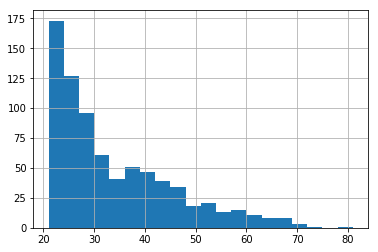

In [13]:
diabetes['Age'].hist(bins=20)

In [14]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [15]:
feat_cols = [num_preg,gluc,bloodpres,skinth,insulin,bmi, diabetes_pedigree,age_bucket]

In [17]:
x_data = diabetes.drop('Outcome',axis=1)

In [18]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [19]:
labels= diabetes['Outcome']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

Input function for the NN model with X_train and y_train

In [22]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, 
                                                 batch_size=10, num_epochs=1000, 
                                                 shuffle=True)

# Linear Classifier

In [23]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpfuvbnflp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3b04eec198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpfuvbnflp/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 160.68
INFO:tensorflow:loss = 5.253292, step = 101 (0.623 sec)
INFO:tensorflow:global_step/sec: 408.108
INFO:tensorflow:loss = 4.421353, step = 201 (0.245 sec)
INFO:tensorflow:global_step/sec: 385.06
INFO:tensorflow:loss = 2.955832, step = 301 (0.260 sec)
INFO:tensorflow:global_step/sec: 417.737
INFO:tensorflow:loss = 4.965594, step = 401 (0.240 sec)
INFO:tensorflow:global_step/sec: 418.799
INFO:tensorflow:loss = 3.7266517, step = 501 (0.238 sec)
INFO:tensorflow:global_step/sec: 404.53
INFO:tensorflow:loss = 4.0360494, step = 601 (0.247 sec)
INFO:tensorflow:global_step/sec: 394.879
INFO:tensorflow:loss = 5

In [25]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y = y_test,
                                                     batch_size=10, num_epochs = 1,
                                                     shuffle = False)

In [37]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-12-15:56:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfuvbnflp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-12-15:56:08
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.79695475, auc_precision_recall = 0.6452595, average_loss = 0.5267809, global_step = 1000, label/mean = 0.35064936, loss = 5.0702662, prediction/mean = 0.3565319


In [27]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79695475,
 'auc_precision_recall': 0.6452595,
 'average_loss': 0.5267809,
 'label/mean': 0.35064936,
 'loss': 5.0702662,
 'prediction/mean': 0.3565319,
 'global_step': 1000}

Prediction

In [28]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, 
                                                      batch_size=10, num_epochs=1,
                                                     shuffle= False)

In [29]:
predictions = model.predict(pred_input_func)

In [30]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfuvbnflp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [34]:
#my_pred

# Dense Neural Networks

In [32]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], 
                                       feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpg2so1eb7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3b04786588>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpg2so1eb7/model.ckpt.
INFO:tensorflow:loss = 6.85781, step = 1
INFO:tensorflow:global_step/sec: 313.554
INFO:tensorflow:loss = 7.95035, step = 101 (0.322 sec)
INFO:tensorflow:global_step/sec: 393.318
INFO:tensorflow:loss = 5.9058714, step = 201 (0.254 sec)
INFO:tensorflow:global_step/sec: 422.061
INFO:tensorflow:loss = 4.1285067, step = 301 (0.237 sec)
INFO:tensorflow:global_step/sec: 426.474
INFO:tensorflow:loss = 6.1357074, step = 401 (0.233 sec)
INFO:tensorflow:global_step/sec: 409.931
INFO:tensorflow:loss = 6.3501844, step = 501 (0.244 sec)
INFO:tensorflow:global_step/sec: 428.594
INFO:tensorflow:loss = 5.0251436, step = 601 (0.234 sec)
INFO:tensorflow:global_step/sec: 391.396
INFO:tensorflow:loss

In [36]:
dnn_results = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-12-15:56:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpg2so1eb7/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-12-15:56:03
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.64935064, auc = 0.8381482, auc_precision_recall = 0.7284749, average_loss = 0.4712812, global_step = 1000, label/mean = 0.35064936, loss = 4.536082, prediction/mean = 0.36387628


In [40]:
print(results,'\n', dnn_results)

{'accuracy': 0.74025977, 'accuracy_baseline': 0.64935064, 'auc': 0.79695475, 'auc_precision_recall': 0.6452595, 'average_loss': 0.5267809, 'label/mean': 0.35064936, 'loss': 5.0702662, 'prediction/mean': 0.3565319, 'global_step': 1000} 
 {'accuracy': 0.76623374, 'accuracy_baseline': 0.64935064, 'auc': 0.8381482, 'auc_precision_recall': 0.7284749, 'average_loss': 0.4712812, 'label/mean': 0.35064936, 'loss': 4.536082, 'prediction/mean': 0.36387628, 'global_step': 1000}
